<a href="https://colab.research.google.com/github/mwingter/Calculo-Numerico/blob/master/Trabalho/Calculonumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Grupo:***  
*João Reis, 9293373  
Michelle Wingter da Silva, 10783243*

# **Cálculo Numérico - SME0104 - 2020**
---



- Importações para rodar as bibliotecas necessárias --------------------------------------------


In [51]:
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt

## **MÉTODO DE RESOLUÇÃO DE SISTEMAS LINEARES**

### **1. Teoria**

---




Utilizada nos mais diversos campos da ciência, sendo extremamente útil para resolver problemas relacionados a balanceamento de equações químicas, trâfego nas cidades e de redes e circuitos elétricos, os sistemas lineares são um conjunto de m equações lineares com n variaveis da seguinte forma:

$S =
  \begin{cases}
    a_{1,1}x_1 + a_{1,2}x_1 + ... + a_{1,n}x_n = b_1  \\
    a_{2,1}x_1 + a_{2,2}x_1 + ... + a_{2,n}x_n = b_2  \\ 
    ...            \\
    a_{m,1}x_1 + a_{m,2}x_1 + ... + a_{m,n}x_n = b_m  \\
  \end{cases}
$

onde $ a_{i,j}, b_i \in \Re$ para $ 1 \leq i \leq m$ e $1\leq j \leq n$ e também pode ser descrito por Ax = b, onde x são as soluções. 


Este trabalho visa estudar alguns métodos numéricos utilizados para resolver sistemas lineares de uma maneira prática e rápida, possibilitando assim determinar a resposta de sistemas mais complexos. Esses métodos podem ser divididos em dois tipos: os métodos diretos, onde a solução é encontrada após um número determinado de passos e de forma exata, e os métodos indiretos, onde a solução é calculada a cada iteração, a partir de um palpite inicial, de forma com que forme uma sequência que acaba convergindo para a resposta correta. 


---



Para entender como cada método funciona primeiro é preciso explicar alguns conceitos e teorias utilizados por eles. Como mostrado antes, é possível escrever S na forma matricial Ax = b, onde A é a matriz dos coeficientes das equações, x é o vetor das incognitas e b o vetor de resposta.

$A_{m,n} = 
 \begin {pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$
 
 
  $x_n =
 \begin{pmatrix}
  x_1  \\
  x_2  \\
  \vdots    \\
  x_n 
 \end{pmatrix}$

 $b_n =
 \begin{pmatrix}
  b_1  \\
  b_2  \\
  \vdots    \\
  b_m 
 \end{pmatrix}$






---





Códigos em latex para matemática

\begin{align}
  3x_1+x_2-x_3&=1 \\
2x_2-x_3&=0\\
x_2+x_3&=6
\end{align}
ou este
\begin{align}
  3x_1+x_2-x_3&=1 \\
2x_2-x_3&=0\\
x_3&=4
\end{align}


$S_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$




 [ f(n) =
  \begin{cases}
    n/2       & \quad \text{if } n \text{ is even}\\
    -(n+1)/2  & \quad \text{if } n \text{ is odd}
  \end{cases}
\]

### **2. Códigos**

In [2]:
n = 4 #dimensão do sistema
A = np.array([[1,1,0,3],[2,1,-1,1],[3,-1,-1,2],[-1,2,3,-1]]) #matrix do sistema linear
b = np.array([4,1,-3,4]) #vetor solução

- Método Direto

**I) Eliminação de Gauss --------------------** 



In [3]:
def elimination(A, b, n):
  for i in range(n):
    pivot = A[i][i]
    for k in range(i+1,n):
      Mik = A[k][i] / pivot
      b[k] = b[k] - Mik * b[i]
      A[k] = A[k] - Mik * A[i] 
  
  return A, b

In [4]:
def retro_substitution(A, b, n):
  x = np.zeros(n)
  for i in range(n-1, -1,-1):
    x[i] = b[i]
    sum = 0 
    j = n-1
    while (j>i):
      sum = sum + A[i][j] * x[j]
      j = j-1  
    x[i] = (x[i] - sum)/A[i][i]
  
  return x

In [5]:
def gauss_elimination(A, b, n):
  C, blinha = elimination(A,b,n)
  x = retro_substitution(C,blinha,n)
  return x

In [6]:
print("Resposta do sistema linear:", gauss_elimination(A, b, n))

Resposta do sistema linear: [-1.  2.  0.  1.]


- Métodos Iterativos

**II) Método de Gauss-Jacobi --------------------**


In [7]:
n = 3 #dimensão do sistema
A = np.array([[6,3,1],[4,9,-3],[1,-1,3]]) #matrix do sistema linear
b = np.array([10,16,14]) #vetor solução
x0 = np.array([-1.8,5.5,7.3]) # chute inicial
x = np.vstack((x0,np.zeros(3)))
epsilon = 0.1 #erro
limit = 100 #limite de iteracao

In [8]:
def gauss_jacobi(A,b,x,n,e):
  k = 1
  while (np.max(np.abs(x[1]-x[0])) > e) and (k < limit):
    if (k!=1): x[0] = x[1]
    for i in range(n):
      sum = 0 
      for j in range(n):
        if j != i: 
          sum = sum + (A[i][j] * x[0][j])
      x[1][i] = ((b[i] - sum) / A[i][i])
    k = k + 1
    print(np.max(np.abs(x[1]-x[0])))
  return x[1]

In [9]:
%%timeit
gauss_jacobi(A,b,x,n,epsilon)

0.5000000000000002
0.2777777777777781
0.12222222222222268
0.06790123456790154
The slowest run took 341.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.22 µs per loop


**III) Método de Gauss-Seidel --------------------**

In [10]:
n = 4 #dimensão do sistema
A = np.array([[2.0,-1.0,0,0],[1.0,2.0,-1.0,0],[0,-1.0,2.0,-1.0],[0,0,-1.0,2.0]]) #matriz
b = np.array([1,1,1,1]) #vetor b
xi = np.array([1.0,1.0,1.0,1.0]) #vetor aproximação inicial
x = np.array([1.0,1.0,1.0,1.0]) #vetor aproximação
e = 0.001 #erro

In [11]:
def iteration(A, b, xi, x, n): ##iteração k, em que se calcula os valores do array x
    for i in range(n):
        sum1 = 0 
        sum2 = 0
        for j in range(0, i):
            sum1 = sum1 + A[i][j] * x[j]
        for j in range (i+1, n):
            sum2 = sum2 + A[i][j] * xi[j]
        x[i] = (1/A[i][i]) * (b[i] - sum1 - sum2)

In [12]:
def stopCriteria(x, xi, n, e): #Critério de parada. Se retornar true, o critério foi satisfeito; se false, não foi.
    max = -99999
    for i in range(n):
        tot = abs(x[i] - xi[i])
        if(max < tot):
            max = tot
    if(max < e):
        return True
    else:
        return False

In [13]:
def gauss_seidel(A, b, xi, x, e, n):
    k = 1 #contador de iterações
    while(k < 25): # limite máximo de iterações
        iteration(A, b, xi, x, n)
        if (stopCriteria(x, xi, n, e)):
            return x
        else:
            k = k + 1
            for i in range(n):
                xi[i] = x[i]

In [14]:
#print("Resposta do método Gauss-Seidel:", gauss_seidel(A, b, xi, x, e, n))

### **3. Aplicação**

In [15]:
def random_matrix_vectors(n):
  A =  np.random.rand(n,n)
  b = np.random.rand(n)
  return A,b

In [16]:
for i in range(3,300):
  e = 10e-5
  A,b = random_matrix_vectors(i)
  #metodo direto
  gauss_elimination(A,b,i)
  #metodos iterativos
  x = np.ones(i)
  gauss_jacobi(A,b,x,i,e)
  gauss_seidel(A,b,x,x,e,i)

In [17]:
inicio = time.time()
random_matrix_vectors(100)
fim = time.time()

In [18]:
fim - inicio

0.0002815723419189453

In [19]:
A

array([[ 7.07965919e-01,  7.68692389e-01,  4.74975806e-02, ...,
         8.52307613e-01,  9.95936062e-01,  7.87715449e-02],
       [ 0.00000000e+00,  7.45124346e-02,  4.85499611e-01, ...,
        -2.85211035e-01, -6.22242957e-01,  6.47233230e-01],
       [ 0.00000000e+00,  0.00000000e+00, -6.69698947e-01, ...,
        -1.78880377e-01,  6.55092548e-01, -8.26878177e-01],
       ...,
       [ 2.72054872e-16,  2.53815132e-16, -1.61214751e-15, ...,
        -1.26784676e-01, -1.58041810e+00,  5.18240020e+00],
       [ 4.60781749e-15,  4.24159184e-15, -2.59830853e-14, ...,
         0.00000000e+00, -2.41963336e+01,  8.39067859e+01],
       [-2.19760995e-15, -9.61324534e-16,  4.36935709e-15, ...,
         0.00000000e+00,  0.00000000e+00, -1.75716293e+01]])

## **MÉTODO DOS MÍNIMOS QUADRADOS**

### **1. Teoria**

Muitos problemas do dia-a-dia possuem erros, ou seja, valores incorretos gerados pelas coletas experimentais do problema a ser resolvido. O método dos mínimos quadrados veio da necessidade desses casos, em que precisamos aproximar valores para a função fora de um intervalo tabelado, ou ajustar pontos tirados de algum experimento. Por exemplo, em física experimental, ele considera os erros de medição.
 
Assim, o problema que iremos resolver com o método dos mínimos quadrados é obter, dado um conjunto de funções conhecidas, a melhor reta ou curva que aproxima essas funções.
 
Sendo assim, dados $m$ pontos de $f(x)$ em uma tabela contidos em um intervalo $[a,b]$, o método consiste em escolhermos $n$ (onde $n < m$) funções contínuas em $[a,b]$ (denotaremos tais funções como $h_1(x), h_2(x), …, h_n(x)$ ) e obter $n$ constantes ($c_1, c_2, …, c_3$), de modo que o polinômio $p(x)$:    
 
> $p(x) = c_1h_1(x) + c_2h_2(x) + … + c+nh_n(x)$ 
 
seja o mais próximo possível de $f(x)$, ou seja, queremos minimizar o desvio entre $f(x)$ e $p(x)$ de modo que o erro seja o menor possível. Para encontrar este erro, basta calcular: 
 
> $ min (\sum_{k=1}^m(f(x_k) - p(x_k))^2) $
 
Portanto, para encontrar o polinômio $p(x)$ basta calcular o sistema de equações lineares do tipo $Ax=b$ abaixo:
 
> $ \begin{bmatrix}  
      \langle \overline{h_1},\overline{h_1}  \rangle & \langle \overline{h_1},\overline{h_2}  \rangle & ... & \langle \overline{h_1},\overline{h_n}  \rangle \\      \langle \overline{h_2},\overline{h_1}  \rangle & \langle \overline{h_2},\overline{h_2}  \rangle & ... & \langle \overline{h_2},\overline{h_n}  \rangle \\ ... & ... & ... & ...\\
       \langle \overline{h_n},\overline{h_1}  \rangle & \langle \overline{h_n},\overline{h_2}  \rangle & ... & \langle \overline{h_n},\overline{h_n}  \rangle \end{bmatrix}
      \begin{bmatrix} c_1 \\ c_2 \\ ... \\ c_3\end{bmatrix} = 
      \begin{bmatrix} \langle \overline{f},\overline{h_1}  \rangle \\ \langle \overline{f},\overline{h_2}  \rangle \\ .. \\ \langle \overline{f},\overline{h_n}  \rangle \end{bmatrix}$
 
que possui solução única ($c_1, c_2, ..., c_n$), onde $\langle \overline{a},\overline{b}  \rangle$ é o produto escalar de $a$ por $b$, e a matriz $A$ é simétrica $(n\times n)$.
 
**- Caso Não-Linear**
 
Os casos acima são válidos para casos Lineares. No entanto, é possível também que os casos sejam não-lineares, e, para resolver isto, basta linearizá-los e então resolvê-los normalmente como mostrado acima. A forma de linearizar as funções depende do tipo do problema. Alguns casos de linearização são, por exemplo:
 
> **1) $f(x) \approx \frac{1}{c_1 + c_2x} = p(x)$**
 
$\frac{1}{f(x)} \approx c_1 + c_2 x = \phi (x)$
 
 
> **2) $f(x) \approx c_1 e^{c_2 x} = p(x)$**

$ln(f(x)) \approx ln(c_1) + c_2 x = a_1 + a_2 x = \phi (x)$

Resolvendo este sistema linear, obtemos:

$a_1 = ln(c_1) \Longrightarrow c_1 = e^a_1$

$a_2 = c_2 \Longrightarrow c_2 = a_2$
 
 
> **3) $f(x) \approx c_1 c_2^x = p(x)$**
 
$ln(f(x)) \approx ln(c_1) + xln(c_2) = a_1 + a_2 x = \phi (x)$ 
 
Resolvendo este sistema linear, obtemos:
 
$a_1 = ln(c_1) \Longrightarrow c_1 = e^{a_1}$
 
$a_2 = ln(c_2) \Longrightarrow c_2 = e^{a_2}$
 
 
> **4) $f(x) \approx c_1 x^{c_2} = p(x)$**
 
$ln(f(x)) \approx ln(c_1) + c_2 ln(x) = a_1 + a_2 ln(x) = \phi (x)$
 
Resolvendo este sistema linear, obtemos:
 
$a_1 = ln(c_1) \Longrightarrow c_1 = e^{a_1}$
 
$a_2 = c_2$
 
> **5) $f(x) \approx \sqrt{c_1 + c_2 x} = p(x)$**
 
$[f(x)]^2 \approx c_1 + c_2 x = \phi (x)$

> **6) $f(x) \approx x ln(c_1 + c_1 x)$**

$e^{\frac{f(x)}{x}} = c_1 + c_2x = \phi (x)$



### **2. Códigos**

In [41]:
f = np.array([0.459,0.828,1.006,1.150,1.354,1.261,1.157,0.834,0.511]) #vetor de valores f
M = np.array([[0.01,0.04,0.09,0.16,0.25,0.36,0.49,0.64,0.81],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],[1,1,1,1,1,1,1,1,1]]) #matriz com os n vetores hk
n = 3 #dimensão da matriz simétrica A

In [44]:
def min_quadrados(f, M, n):
    A = np.zeros((n,n)) # matriz n x n cheia de zeros
    b = np.zeros(n) #vetor b de tamanho n cheia de zeros
    for i in range(n):
        for j in range(i+1):
            A[i][j] = round(np.dot(M[i],M[j]), 3) # np.dot calcula o produto escalar entre dois vetores
            A[j][i] = round(np.dot(M[i],M[j]), 3)
    
    for i in range(n):
        b[i] = round(np.dot(f,M[i]), 3)
    
    #print("A = ", A)
    #print("b = ", b)

    return A, b
    # utilizando o método de resolução de sistemas lineares para encontrar os coeficientes da solução
    #return gauss_elimination(A, b, n)

In [45]:
A, b = min_quadrados(f,M,n)
print("Sistema Linear da solução dos mínimos quadrados:")
print("A = ", A)
print("B = ", b)

#print("Resposta dos mínimos quadrados:", min_quadrados(f, M, n))

print("Solução do Sistema Linear:", gauss_elimination(A, b, n))

Sistema Linear da solução dos mínimos quadrados: [[1.533 2.025 2.85 ]
 [2.025 2.85  4.5  ]
 [2.85  4.5   9.   ]] [2.619 4.344 8.56 ]
Solução do Sistema Linear: [-5.10382514  5.2104918  -0.0379235 ]


### **3. Aplicação**

**Aplicação 1)** Utilizando o método dos mínimos quadrados implementados para resolver o sistema linear abaixo:

Aproximar a função $f(x) = e^x$ pela parábola $p(x) = c_1 x^2 + c_2 x + c_3$.
 
Sendo: 
 
$h_1 (t) = t^2$
 
$h_2 (t) = t$
 
$h_1 (t) = 1$
 
Temos que:
 
$\overline{h_1}= (0.01,0.04,0.09,0.16,0.25,0.36,0.49,0.64,0.81)$
 
$\overline{h_2}= (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)$
 
$\overline{h_3}= (1,1,1,1,1,1,1,1,1)$
 
$\overline{f} = (1.105,1.221,1.348,1.491,1.64,1.822,2.013,2.22,2.459)$
 
Utilizando o método dos mínimos quadrados para chegar no sistema do tipo abaixo:
 
> $ \begin{bmatrix}  
      \langle \overline{h_1},\overline{h_1}  \rangle & \langle \overline{h_1},\overline{h_2}  \rangle & ... & \langle \overline{h_1},\overline{h_n}  \rangle \\      \langle \overline{h_2},\overline{h_1}  \rangle & \langle \overline{h_2},\overline{h_2}  \rangle & ... & \langle \overline{h_2},\overline{h_n}  \rangle \\ ... & ... & ... & ...\\
       \langle \overline{h_n},\overline{h_1}  \rangle & \langle \overline{h_n},\overline{h_2}  \rangle & ... & \langle \overline{h_n},\overline{h_n}  \rangle \end{bmatrix}
      \begin{bmatrix} c_1 \\ c_2 \\ ... \\ c_3\end{bmatrix} = 
      \begin{bmatrix} \langle \overline{f},\overline{h_1}  \rangle \\ \langle \overline{f},\overline{h_2}  \rangle \\ .. \\ \langle \overline{f},\overline{h_n}  \rangle \end{bmatrix}$


 
 


In [48]:
f = np.array([1.105,1.221,1.348,1.491,1.64,1.822,2.013,2.22,2.459]) #vetor de valores f
M = np.array([[0.01,0.04,0.09,0.16,0.25,0.36,0.49,0.64,0.81],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],[1,1,1,1,1,1,1,1,1]]) #matriz com os n vetores hk
n = 3 #dimensão da matriz simétrica A

A, b = min_quadrados(f,M,n)
print("Sistema Linear da solução dos mínimos quadrados:")
print("A = ", A)
print("B = ", b)

Sistema Linear da solução dos mínimos quadrados:
A =  [[1.533 2.025 2.85 ]
 [2.025 2.85  4.5  ]
 [2.85  4.5   9.   ]]
B =  [ 5.885  8.667 15.319]


Chegando no sistema:

$\begin{equation}
    \left[ \begin{array}{ccc}
        1.533 & 2.085 & 2.85 \\
        2.025 & 2.85 & 4.5 \\
        2.85 & 4.5 & 9
    \end{array} \right] \left[ \begin{array}{c}
        c_1 \\ c_2 \\ c_3
    \end{array} \right] = \left[ \begin{array}{c}
        5.885 \\ 8.667 \\ 15.319
    \end{array} \right]
\end{equation}$

 
E então utilizando o método de eliminação de gauss para resolver o sistema encontrado:
 

In [53]:
coef = gauss_elimination(A, b, n)
print("Solução do Sistema Linear:", coef)

Solução do Sistema Linear: [0.86830601 0.81086066 1.02171721]


Obtemos, então, os coeficientes de $p(x)$:

$c_1 = 0.8683$

$c_2 = 0.8108$

$c_3 = 1.0217$

Portanto, $p(x) = 0.8683 x^2 + 0.8108 x + 1.0217

Plotando em um gráfico, podemos ver o desvio entre $f(x)$ e $p(x)$:

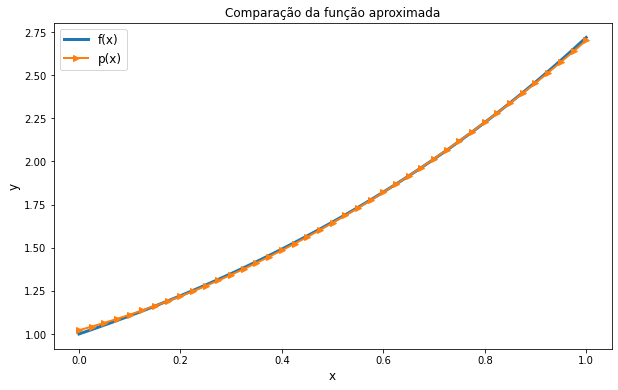

In [54]:
p = lambda x: coef[2] + coef[1]*x + coef[0]*x**2;
x = np.linspace(0, 1, num=41, endpoint=True)
# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'p(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da função aproximada') 
plt.legend(fontsize='large') 
plt.show()

No gráfico acima, podemos ver que o desvio entre f(x) e p(x) é bem pequeno.

## **MÉTODO DE RESOLUÇÃO DE SISTEMAS NÃO LINEARES**

### **1. Teoria**

Na vida academica, ao longo da vida, estamos acostumados a trabalhar com sistemas de equações lineares, pois estes tem propriedades que facilitam muito os cálculos. No entanto, no mundo real a maioria dos problemas não ocorrem de forma linear.

Sistemas não lineares são frequentemente utilizados para cálculos e estudo em diferentes áreas, como biológias, socais, criptografia, telecomunicações, economia, linguística, e várias outras áreas em que são considerados diversos fatores, obtendo assim diversas váriáveis, ou seja, um sistema não linear.

Uma equação que contenha uma expressão do tipo $x^2, y^{-2}, x\cdot y, z, y, sen(x), ex+z$ ,etc, é chamada não-linear em $x, y, z, ...$, porque ela não pode ser escrita como $ax + by + cz + ... = cte$ que é uma equação linear em $x, y, z$,... . 

Um sistema de equações não lineares é um conjunto de equações não lineares, onde os polinômios são de grau maior que um, resultando em infinitas variáveis. Trazendo todos os termos diferentes de zero à esquerda de todas as equações, tem-se uma forma geral que pode ser usada para qualquer sistema não-linear. 

Sendo assim, queremos resolveremos sistemas de $n$ equações não lineares e $n$ incógnitas do tipo $F(x) = 0$:

>$S =
  \begin{cases}
    f_1(x_1,x_2,...,x_n) = 0  \\
    f_2(x_1,x_2,...,x_n) = 0  \\
    ...            \\
    f_n(x_1,x_2,...,x_n) = 0  \\
  \end{cases}
$


Apesar de não ser fácil de ser resolvido, existem métodos que resolvem estes sistemas, sendo que um dos principais métodos usados para a resolução de um sistema não-linear é o **Método de Newton para Sistemas**.  

**- Método de Newton para Sistemas**

Basicamente, o Método de Newton, a partir de uma aproximação inicial $x_0$ , 
e assumindo que a função $F(x)$ é diferenciável e que existe um ponto $x_∗$ tal que $F(x_∗)= 0$, consiste em definir a sequência {$x_k$} através dos seguintes passos: 

> - A resolução do sistema linear: $J(x_k) s_k = −F(x_k)$
>
> - A atualização do novo valor $x_{k+1} = x_k + s_k$

Onde $s_k$ é a solução do sistema linear acima, e $J(x_k)$ é a matriz jacobiana dada por:

> $  
  \begin{equation*}
  J(x) = 
  \begin{bmatrix}
    \frac{∂f_1(x)}{∂x_1} 	&	\frac{∂f_1(x)}{∂x_2} & ........ &	\frac{∂f_1(x)}{∂x_n} \\
    \frac{∂f_2(x)}{∂x_1} 	&	\frac{∂f_2(x)}{∂x_2} &........ &	\frac{∂f_2(x)}{∂x_n} \\
    ...				 \\
    \frac{∂f_n(x)}{∂x_1} 	&	\frac{∂f_n(x)}{∂x_2} & ........ &	\frac{∂f_n(x)}{∂x_n}  \\
  \end{bmatrix}
  \end{equation*}
$

Com isso, são realizadas $k$ iterações, a partir da utilização destas aproximações lineares para $k = 0, 1, 2, ...$, gerando uma sequência que, sob certas hipóteses, converge para a solução. Além disso, como em qualquer método iterativo, é preciso ter um critério de parada para aceitar um ponto $x_k$ 
como uma boa aproximação da solução exata $x_∗$. Um critério de parada (utilizado na implementação do método de newton neste trabalho) é o do erro absoluto, que consiste em vericar se a norma entre duas iterações sucessivas está próxima de zero (dado um erro $e$ máximo), isto é, escolhemos $x_{k+1}$ como uma boa aproximação para a solução exata $x_∗$ , se temos $||x_{k+1} − x_k || < e$.


### **2. Códigos**

**I) Método de Newton**

In [24]:
n = 2 #numero de elementos em x
xi = np.array([-1, 6]) #vetor aproximação inicial
F = np.array([[1,1,-5],[1,1,-25]])
e = 0.1 #erro e

In [25]:
def toJacobian(f, x, n):
    J = np.zeros((n, n))
    for i in range(n): #para cada linha
        for j in range(n): #para cada coluna
            for k in range(n): #para cada x (x1, x2, x3, etc) -> por ex se n=2, temos x1 e x2
                if(i == k): 
                    J[i][j] = f[i][j] * (i+1) * (x[j] ** i) ##derivando e ja substituindo x
    return J

In [26]:
def iteration_newton(n, xi, F, e):
    Jx = np.zeros((n,n)) #(A) matriz n x n cheia de zeros 
    Fx = np.zeros(n) #(b) vetor de tamanho n cheia de zeros 

    #encontrando o sistema Ax=b 
    for i in range(n): #Encontrando o 'b' (Fx)
        Fx[i] = F[i][n]
        for j in range(n):
            Fx[i] = Fx[i] + F[i][j] * (xi[j] ** (i+1))
    Jx = toJacobian(F, xi, n) #encontrando o 'A' (Jx)

    y = gauss_elimination(Jx, -Fx, n) #gauss(A,b,n) resolvendo o sistema linear A.x=b (ou Jx.x=-Fx) usando o metodo da eliminação de gauss
    x = xi + y
    return x

In [27]:
def newton(n, xi, F, e):
    k = 1 #contador de iterações
    while (k < 25):
        x = iteration_newton(n, xi, F, e)
        if (stopCriteria(x, xi, n, e)):
            return x
        else:
            k = k + 1
            for i in range(n):
                xi[i] = x[i]

In [28]:
print("Resultado do Método de Newton:", newton(n,xi,F,e))

Resultado do Método de Newton: [0. 5.]


### **3. Aplicação**

Um exemplo de aplicação de sistemas de equações não-lineares poderia ser para, por exemplo, explicar o funcionamento do cérebro humano, pra ver quais partes se ativam ao realizarmos determinadas atividades. Para isso, devem ser levados em conta diversos fatores, considerando componentes químicos, físicos e biológicos do cérebro, obtendo diversas variáveis, ou seja, um sistema não linear para cada cidadão pesquisado.

## **MÉTODO DE AUTOVALORES E AUTOVETORES**

### **1. Teoria**


##Autovalores e autovetores

Pode ser considerado como autovetor de $A_{n \times n}$, o vetor existente dentro do espaço dos reais, não nulo de tal forma que se multiplicado por A este não tem a sua direção afetada, apenas mudando em sentido e magnitude. Ou seja, se tomarmos um escalar ${\lambda} \in  \mathbb{C}$ temos a seguinte expressão:
 > ${Av = \lambda v }$ 

onde v é autovetor de A e ${\lambda}$ seu autovalor associado. Estes autovetores acabam resumindo as principais propriedades de sua matriz associada e são utilizados por exemplo no algoritmo PCA para fazer a redução de dimensionalidade da matriz. Além disso, caso subtrairmos o autovalor ${\lambda}$ da diagonal principal de A, obtemos uma matriz singular. Sendo o mesmo que realizar a seguinte operação ${(A - \lambda I)}$.
De tal forma é possível calcular este autovalor ${\lambda}$ descobrindo as raízes de um polinômio característico ${P(\lambda)}$
> ${Av = \lambda v  = \lambda I v  \Longleftrightarrow (A - \lambda I )v = \overline{0}   \Longleftrightarrow det(A - \lambda I) =  0}$ 

É importante também entendermos o conceito de matrizes semelhantes. $A_{n \times n}$ e $B_{n \times n}$ são consideradas semelhantes se existir uma outra matriz $P_{n \times n}$, que pode ser invertida, e a seguinte equação seja possível:
> $B = P^{-1}AP$

Matrizes semelhantes entre si possuem os mesmos autovalores.
### Método das Potências 

Existem diversos métodos numéricos para se calcular todos os  autovalores e autovetores de uma matriz. Podemos entre eles citar a Decomposição QR e o Método de Francis. No entanto, muitas vezes descobrir apenas um autovalor e um autovetor específico já resolve o problema proposto e é por isso que o método das potências é utilizado.

Este método tem como objetivo calcular qual o autovalor dominante $\lambda_1$ e o autovetor associado a ele, da matriz $A_{n \times n }$. Para isso é necessário que A possua como matriz semelhante uma matriz diagonal, sendo assim diagonalizável. Isto faz com que A tenha um conjunto de n autovetores v ${ \in \mathbb{R}^n}$ linearmente independentes entre si. É necessário também que os n autovalores associados a v sejam ordenados em módulo, de modo que exista um valor único maior que os outros:
 >$ |\lambda_n| \leq |\cdots| \leq |\lambda_3| \leq |\lambda_2| < |\lambda_1|$

Através do quociente de Rayleigh é possível se obter informação de um autovetor e assim determinar qual seu autovalor associado. 
>$\mu_{(x)} = {x \times Ax \over \begin{Vmatrix}x\end{Vmatrix}_2^2}$

O método das potências consegue chegar no valor do autovalor dominante através de um processo iterativo e recursivo, onde:
> $x^{(k)} = Ay^{(k-1)}$, 
>$y^{(k)} = {x^{(k)}\over \begin{Vmatrix}x\end{Vmatrix}_2 }$,
>$\lambda_1^{(k)} = y^{(k)} \times Ay^{(k)}$ 

É calculado o $y^0$ através da normalização do chute inicial $x^0$ e para $k = 1, /cdots, n$ o $x^k$ e igual a multiplicação da matriz A pelo valor do y anterior. Em seguida $y^k$ é normalizado e é aplicado o rayleigh para se obter o autovalor relacionado a $y^k$. O procedimento é interrompido quando o numéro de iterações chega no k = kmax ou quando a diferença $ | \lambda_1^{(K+1)} - \lambda_1^{(K+1)} |  >\epsilon $

É interessante ver que o resultado é feito atráves de recursivas multiplicacoes dos vetores por A

### **2. Códigos**

**I) Método das Potências**

In [29]:
k = 1
A = np.array([[-4,14,0],[-5,13,0],[-1,0,2]]) #matriz
x = np.array([1.0,1.0,1.0]) #vetor aproximação inicial 



In [30]:
z = np.dot(A,x.T)
p = np.argmax(z)
z = z/z[p]
z


array([1. , 0.8, 0.1])

In [31]:
def power_method(A,x,epsilon,limit):
  for k in range(limit):
    x1 = np.dot(A,x) # xk = Ay
    p = np.argmax(x1)
    lam = x1[p]
    x1 = x1/x1[p]
    diff = x - x1  
    if x1[p] == 0:
      return 0, x
    if (np.linalg.norm(diff) < epsilon):
      return lam, x1
    x = x1
  return lam, x, k

In [32]:
lam, x = power_method(A,x,10e-9,100)
print("Autovalor:", lam)
print("Autovetor:", x)

Autovalor: 6.000000051089694
Autovetor: [ 1.          0.71428572 -0.24999999]


### **3. Aplicação**